In [1]:
from cate.core.ds import DATA_STORE_REGISTRY
from cate.util import ConsoleMonitor
import cate.ops as ops

monitor = ConsoleMonitor()

In [2]:
cc = ops.open_dataset('esacci.CLOUD.mon.L3C.CLD_PRODUCTS.AVHRR.NOAA-17.AVHRR_NOAA.1-0.r1',
                      '2007-01-01',
                      '2007-12-31', sync=True, monitor=monitor)
oz = ops.open_dataset('esacci.OZONE.mon.L3.NP.multi-sensor.multi-platform.MERGED.fv0002.r1',
                      '2007-01-01',
                      '2007-12-21', sync=True, monitor=monitor)

In [3]:
cc_tot = ops.select_var(cc, 'cc_total')
oz_tot = ops.select_var(oz, 'O3_du_tot')
cc_tot_res = ops.coregister(oz_tot, cc_tot)

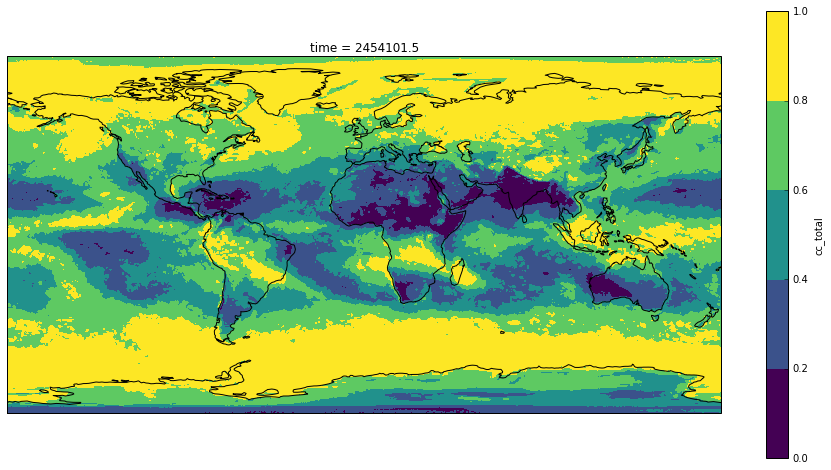

In [4]:
%matplotlib inline
ops.plot_map(cc_tot, var='cc_total', time=0)

In [44]:
cc_tot_antimeridian = ops.subset_spatial(cc_tot_res, '140, -40, -140, 10', crosses_antimeridian=True, mask=True)

In [45]:
cc_tot_antimeridian.cc_total

<xarray.DataArray 'cc_total' (time: 12, lat: 50, lon: 360)>
dask.array<concate..., shape=(12, 50, 360), dtype=float64, chunksize=(1, 50, 40)>
Coordinates:
  * lon      (lon) float64 -179.5 -178.5 -177.5 -176.5 -175.5 -174.5 -173.5 ...
  * lat      (lat) float32 -39.5 -38.5 -37.5 -36.5 -35.5 -34.5 -33.5 -32.5 ...
  * time     (time) float64 2.454e+06 2.454e+06 2.454e+06 2.454e+06 ...
Attributes:
    long_name: cloud fraction
    standard_name: cloud_area_fraction
    units: %
    valid_min: 0.0
    valid_max: 1.0

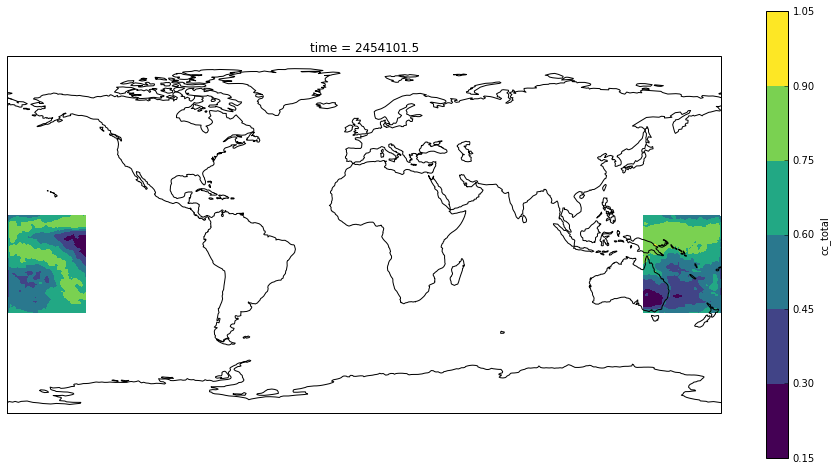

In [46]:
ops.plot_map(cc_tot_antimeridian, var='cc_total', time=0)

## For some reason plotting is not working when CC is left in original resolution

In [47]:
cc_tot_antimeridian = ops.subset_spatial(cc_tot, '140, -40, -140, -10', crosses_antimeridian=True, mask=True)

ValueError: could not broadcast input array from shape (60,560) into shape (80,560)

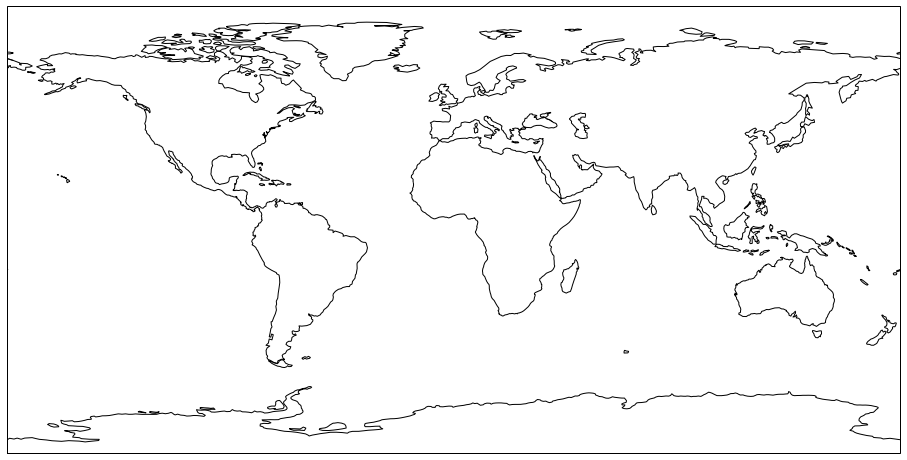

In [48]:
ops.plot_map(cc_tot_antimeridian, var='cc_total', time=0)

But retrieving the dataset to print it works...

In [49]:
cc_tot_antimeridian

<xarray.Dataset>
Dimensions:       (hist_cot: 7, hist_cot_bin: 6, hist_ctp: 8, hist_ctp_bin: 7, hist_phase: 2, lat: 60, lon: 720, time: 12)
Coordinates:
  * lon           (lon) float64 -179.8 -179.2 -178.8 -178.2 -177.8 -177.2 ...
  * lat           (lat) float32 -39.75 -39.25 -38.75 -38.25 -37.75 -37.25 ...
  * hist_cot      (hist_cot) float32 0.3 1.3 3.6 9.4 23.0 60.0 100.0
  * hist_cot_bin  (hist_cot_bin) float32 1.0 2.0 3.0 4.0 5.0 6.0
  * hist_ctp      (hist_ctp) float32 1100.0 800.0 680.0 560.0 440.0 310.0 ...
  * hist_ctp_bin  (hist_ctp_bin) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0
  * hist_phase    (hist_phase) int32 0 1
  * time          (time) float64 2.454e+06 2.454e+06 2.454e+06 2.454e+06 ...
Data variables:
    cc_total      (time, lat, lon) float64 0.3606 0.7216 0.7081 0.7093 ...

In [50]:
cc_tot_antimeridian.cc_total

<xarray.DataArray 'cc_total' (time: 12, lat: 60, lon: 720)>
dask.array<concate..., shape=(12, 60, 720), dtype=float64, chunksize=(1, 60, 80)>
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 -177.8 -177.2 -176.8 ...
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 -37.75 -37.25 -36.75 ...
  * time     (time) float64 2.454e+06 2.454e+06 2.454e+06 2.454e+06 ...
Attributes:
    long_name: cloud fraction
    standard_name: cloud_area_fraction
    units: %
    valid_min: 0.0
    valid_max: 1.0

OK, this has something to do with chunksizes